<img src="./img/header.png" />

# <a>Projeto de Ciência de Dados na Prática</a>

*Let's Data - Semana Como se Tornar um Cientista de Dados*

## <a> Motivação </a>

Classificação de imagens tem inúmeras aplicações! Dominar essa técnica dá uma vantagem muito grande para quem começa na carreira. Quem tem no portifólio aplicação prática de algo relacionado a isso já aparece em vantagem.

Portanto, estamos fazendo uma classificação de raças de cachorro, mas poderia ser um monte de outras coisas: 

- Identificar fotos de documentos pessoais
- Avaliar assinaturas
- Classificar marcas de tênis e sapatos
- Identificar peças de roupas



## <a> Objeto de Estudo </a>

Na quarta-feira eu pedi para vocês falarem uma raça de cachorro. Alguns já tem um cachorrinho dessas raças ou são raças que gostam ou acham bonitinhas. Então vocês agora vão descobrir porque eu pedi essa informação pra vocês, que parece tão aleatória.

Vamos fazer uma aplicação para classificar raças de cachorro! E o melhor: vocês vão acessar online e testar com os seus doguinhos!

Trouxemos essas raças pra vocês:

- akita,
- american pitbull,
- beagle,
- boxer,
- buldogue_frances,
- labrador,
- leonberger,
- lulu,
- pastor_alemao,
- pinscher,
- poodle,
- pug,
- rotweiller,
- salsicha,
- shih tzu,
- yorkshire



### <a>Criação e separação de bases</a>

Com as imagens baixadas do google images (a gente usa o Download All Images, mas use o que achar melhor!) podemos separá-las em treino, validação e teste.

O projeto requer somente uma pasta "raw" dentro de "data" com uma pasta para cada classe a ser treinada (no nosso caso, as raças que utilizaremos).

Ex: ./data/raw/salsicha/imagem1.jpg

In [ ]:
#!pip install torch torchvision pillow scikit-learn gradio

In [1]:
# Importar as bibliotecas necessárias: destaque para pytorch

from matplotlib import pyplot as plt
import numpy as np
import os
import PIL.Image

import time
import torch, torchvision
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim

In [2]:
# Primeiro vamos separar as imagens em base de treino, validação e teste
# É interessante deixar uma pasta raw com os dados originais para o caso
# de fazermos alguma "caquinha"

diretorio_base_imagens = './data/raw'
pastas_com_nomes_das_racas = os.listdir('./data/raw')
pastas_com_nomes_das_racas


['akita',
 'american pitbull',
 'beagle',
 'boxer',
 'buldogue_frances',
 'labrador',
 'leonberger',
 'lulu',
 'pastor_alemao',
 'pinscher',
 'poodle',
 'pug',
 'rotweiller',
 'salsicha',
 'shih_tzu',
 'yorkshire']

In [3]:
len(pastas_com_nomes_das_racas)

16

In [4]:
# Vamos criar uma separação estratificada

quantidade_por_label = {pasta: len(os.listdir(os.path.join(diretorio_base_imagens, pasta))) for pasta in pastas_com_nomes_das_racas}

quantidade_por_label

{'akita': 355,
 'american pitbull': 200,
 'beagle': 153,
 'boxer': 199,
 'buldogue_frances': 131,
 'labrador': 148,
 'leonberger': 164,
 'lulu': 266,
 'pastor_alemao': 128,
 'pinscher': 266,
 'poodle': 191,
 'pug': 168,
 'rotweiller': 155,
 'salsicha': 158,
 'shih_tzu': 199,
 'yorkshire': 310}

In [5]:
# Criando as pastas de treino, validação e testes

diretorio_imagens_processadas = './data/processed/'

dir_treino = os.path.join(diretorio_imagens_processadas, 'treino')
dir_validacao = os.path.join(diretorio_imagens_processadas, 'validacao')
dir_teste = os.path.join(diretorio_imagens_processadas, 'teste')

if not os.path.exists(dir_treino):
    os.makedirs(dir_treino)

if not os.path.exists(dir_validacao):    
    os.makedirs(dir_validacao)

if not os.path.exists(dir_teste):
    os.makedirs(dir_teste)

In [6]:
dir_treino, dir_validacao, dir_teste

('./data/processed/treino',
 './data/processed/validacao',
 './data/processed/teste')

In [7]:
diretorio_base_imagens

'./data/raw'

In [8]:
import shutil
from sklearn.model_selection import train_test_split

# Criando uma pasta para cada classe (akita, salsicha, buldogue frances, etc..)
# dentro de treino, validação e teste

for classe in pastas_com_nomes_das_racas:
    # os.path.join cria paths com os separadores corretos pra cada sistema operacional
    # barra normal, barra invertida, isso muda do Windows pro Linux/Mac
    dir_classe_treino = os.path.join(dir_treino, classe)
    dir_classe_validacao = os.path.join(dir_validacao, classe)
    dir_classe_teste = os.path.join(dir_teste, classe)
    
    # Efetivamente criando as pastas de treino, validação e teste
    # Testa primeiro se as pastas já não existem
    if not os.path.exists(dir_classe_treino):
        os.makedirs(dir_classe_treino)

    if not os.path.exists(dir_classe_validacao):
        os.makedirs(dir_classe_validacao)
    
    if not os.path.exists(dir_classe_teste):
        os.makedirs(dir_classe_teste)
    
    # caminho completo para a pasta com imagens originais
    pasta_classe = os.path.join(diretorio_base_imagens, classe)
    
    # listando todos os arquivos de imagem para essa classe
    arquivos_classe = os.listdir(pasta_classe)
    
    arquivos_classe = arquivos_classe[:300]
    
    # separando 80% para treino e 20% para validação+teste
    treino, valid_teste = train_test_split(arquivos_classe, 
                                           shuffle=True, 
                                           test_size=0.2, 
                                           random_state=42)
    
    # separando os 20% da validação+teste em 10% para validação e 10% para teste
    validacao, teste = train_test_split(valid_teste, shuffle=True, test_size=0.5, random_state=42)
    
    # Não precisamos mais dessa lista temporária
    del valid_teste
    
    print(f'{classe} - treino: {len(treino)} - valid: {len(validacao)} - teste: {len(teste)} - total: {len(arquivos_classe)}')
    
    # Copiando os arquivos efetivamente para as pastas de treino, validação e teste
    for imagem_treino in treino:
        caminho_origem = os.path.join(diretorio_base_imagens, classe, imagem_treino)
        caminho_destino = os.path.join(dir_classe_treino, imagem_treino)

        shutil.copy(caminho_origem, caminho_destino)

    for imagem_validacao in validacao:
        caminho_origem = os.path.join(diretorio_base_imagens, classe, imagem_validacao)
        caminho_destino = os.path.join(dir_classe_validacao, imagem_validacao)

        shutil.copy(caminho_origem, caminho_destino)

    for imagem_teste in teste:
        caminho_origem = os.path.join(diretorio_base_imagens, classe, imagem_teste)
        caminho_destino = os.path.join(dir_classe_teste, imagem_teste)

        shutil.copy(caminho_origem, caminho_destino)        
        
        
        
        
    

akita - treino: 240 - valid: 30 - teste: 30 - total: 300
american pitbull - treino: 160 - valid: 20 - teste: 20 - total: 200
beagle - treino: 122 - valid: 15 - teste: 16 - total: 153
boxer - treino: 159 - valid: 20 - teste: 20 - total: 199
buldogue_frances - treino: 104 - valid: 13 - teste: 14 - total: 131
labrador - treino: 118 - valid: 15 - teste: 15 - total: 148
leonberger - treino: 131 - valid: 16 - teste: 17 - total: 164
lulu - treino: 212 - valid: 27 - teste: 27 - total: 266
pastor_alemao - treino: 102 - valid: 13 - teste: 13 - total: 128
pinscher - treino: 212 - valid: 27 - teste: 27 - total: 266
poodle - treino: 152 - valid: 19 - teste: 20 - total: 191
pug - treino: 134 - valid: 17 - teste: 17 - total: 168
rotweiller - treino: 124 - valid: 15 - teste: 16 - total: 155
salsicha - treino: 126 - valid: 16 - teste: 16 - total: 158
shih_tzu - treino: 159 - valid: 20 - teste: 20 - total: 199
yorkshire - treino: 240 - valid: 30 - teste: 30 - total: 300


### <a>Pré processamento</a>

Vamos efetivamente para o processamento das imagens para utilizar no modelo do PyTorch!

Vamos criar as transformações para redimensaionar as imagens e transformá-las em tensores PyTorch.

In [9]:
# Setando o tamanho da imagem
image_size = 255

# Transformando as imagens: para modelos mais robustos tem que caprichar no data augmentation!
# Nesse caso não fizemos nada além do redimensionamento da imagem, mas é sempre bom fazer rotações,
# espelhamentos, crop randomicos pra garantir 
transformacoes_de_imagens = { 
    'treino': transforms.Compose([
        transforms.Resize(size=[image_size, image_size]),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]),
    'validacao': transforms.Compose([
        transforms.Resize(size=[image_size, image_size]),
        transforms.ToTensor(),
    ]),
    'teste': transforms.Compose([
        transforms.Resize(size=[image_size, image_size]),
        transforms.ToTensor(),
    ])
}

In [10]:
# Carregar as imagens
# Determinar as pastas de treino, validação e teste

pasta_treino = dir_treino
pasta_validacao = dir_validacao
pasta_teste = dir_teste

pasta_treino, pasta_validacao, pasta_teste

('./data/processed/treino',
 './data/processed/validacao',
 './data/processed/teste')

#### <a>Preparação para o treinamento</a>

Vamos definir informações importantes para o treinamento do modelo. Tamanho do batch, número de classes, datasets, data loaders, otimizadores.

In [12]:
# Tamanho do batch (ou lote) de treinamento
tamanho_do_batch = 8

# Determinando o número de classes (raças)
numero_de_classes = len(os.listdir(pasta_treino))

numero_de_classes

16

In [ ]:
pasta_treino

In [13]:
# Carregar as imagens usando o datasets do torchvision
data = {
    'treino': datasets.ImageFolder(root=pasta_treino, transform=transformacoes_de_imagens['treino']),
    'validacao': datasets.ImageFolder(root=pasta_validacao, transform=transformacoes_de_imagens['validacao'])
}

In [14]:
data

{'treino': Dataset ImageFolder
     Number of datapoints: 2495
     Root location: ./data/processed/treino
     StandardTransform
 Transform: Compose(
                Resize(size=[255, 255], interpolation=bilinear, max_size=None, antialias=None)
                CenterCrop(size=(224, 224))
                ToTensor()
                Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
            ),
 'validacao': Dataset ImageFolder
     Number of datapoints: 313
     Root location: ./data/processed/validacao
     StandardTransform
 Transform: Compose(
                Resize(size=[255, 255], interpolation=bilinear, max_size=None, antialias=None)
                ToTensor()
            )}

In [15]:
# Mapear os índices com os nomes das classes (cada índice vai ter um nome de hortifruti relacionado)
indice_para_classe = {indice: classe for classe, indice in data['treino'].class_to_idx.items()}

indice_para_classe

{0: 'akita',
 1: 'american pitbull',
 2: 'beagle',
 3: 'boxer',
 4: 'buldogue_frances',
 5: 'labrador',
 6: 'leonberger',
 7: 'lulu',
 8: 'pastor_alemao',
 9: 'pinscher',
 10: 'poodle',
 11: 'pug',
 12: 'rotweiller',
 13: 'salsicha',
 14: 'shih_tzu',
 15: 'yorkshire'}

In [16]:
# Quantidade de imagens para serem utilizados para calcular erro médio e acurácia
num_imagens_treino = len(data['treino'])
num_imagens_validacao = len(data['validacao'])

num_imagens_treino, num_imagens_validacao

(2495, 313)

In [17]:
# Cria os DataLoaders para treino e validação
# O DataLoader organiza os dados de treinamento e validação para o treinamento da rede neural
data_loader_treino = DataLoader(data['treino'], batch_size=tamanho_do_batch, shuffle=True)
data_loader_validacao = DataLoader(data['validacao'], batch_size=tamanho_do_batch, shuffle=True)

In [18]:
data_loader_treino, data_loader_validacao

(<torch.utils.data.dataloader.DataLoader at 0x28f2508d5e0>,
 <torch.utils.data.dataloader.DataLoader at 0x28f12d6d820>)

#### <a>Checar algumas imagens</a>

Vamos visualizar algumas imagens da base de treino para cada uma das classes.

In [19]:
indice_para_classe

{0: 'akita',
 1: 'american pitbull',
 2: 'beagle',
 3: 'boxer',
 4: 'buldogue_frances',
 5: 'labrador',
 6: 'leonberger',
 7: 'lulu',
 8: 'pastor_alemao',
 9: 'pinscher',
 10: 'poodle',
 11: 'pug',
 12: 'rotweiller',
 13: 'salsicha',
 14: 'shih_tzu',
 15: 'yorkshire'}

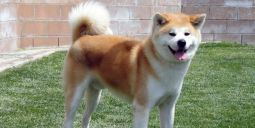

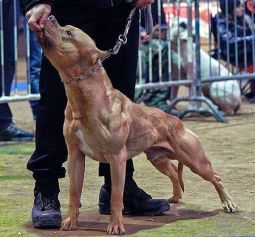

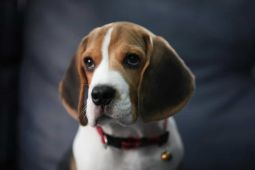

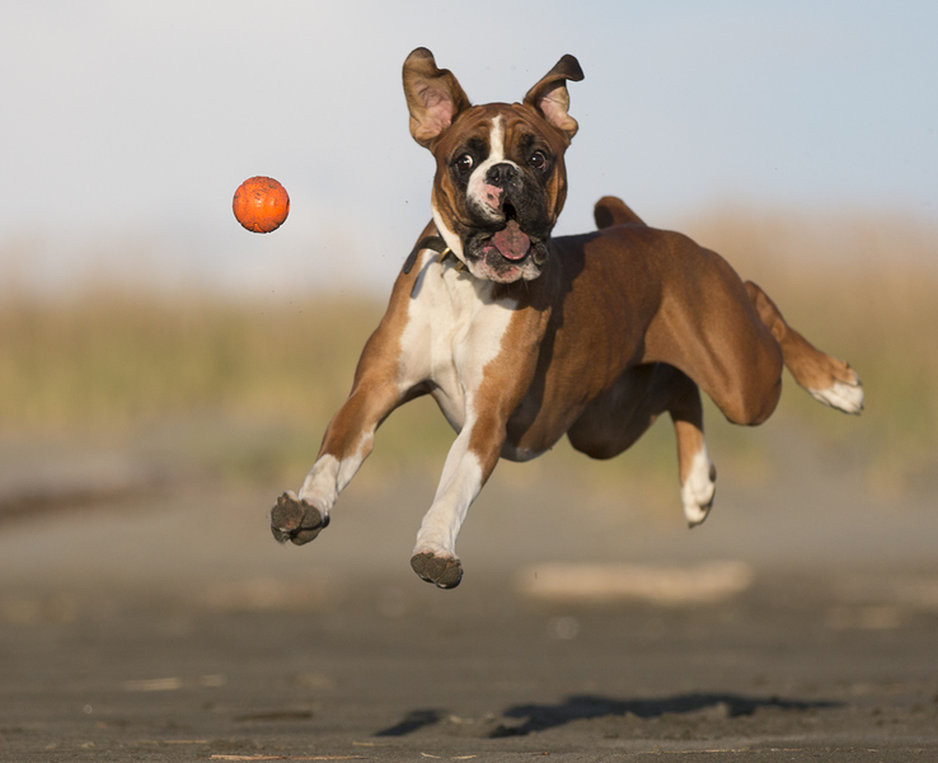

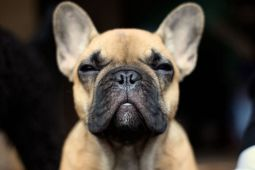

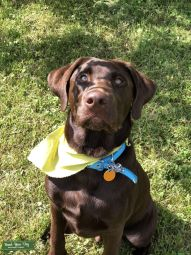

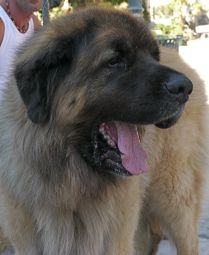

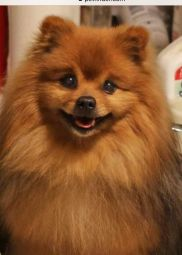

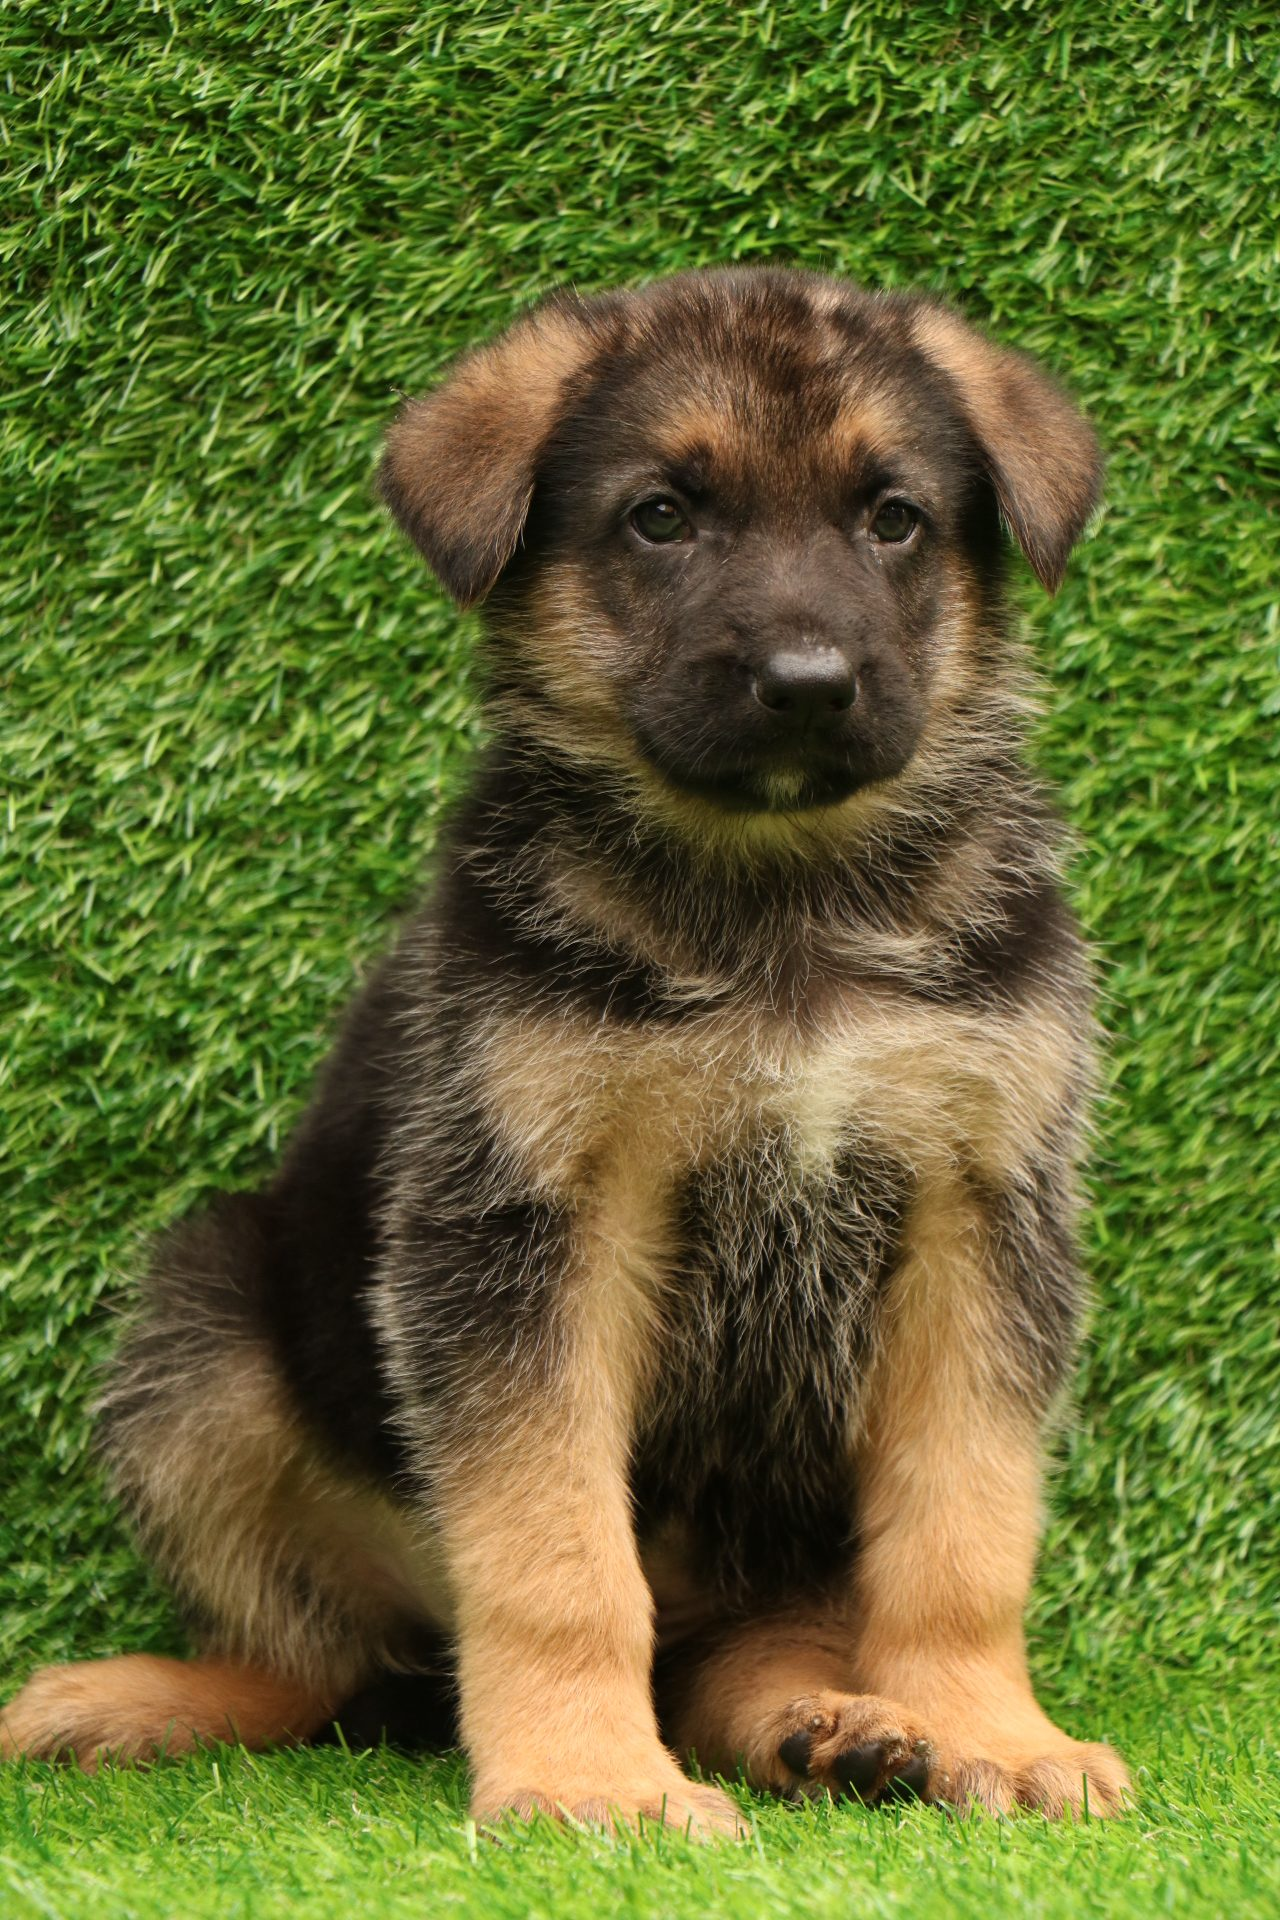

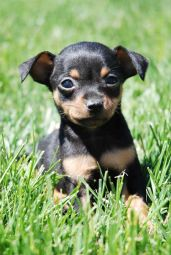

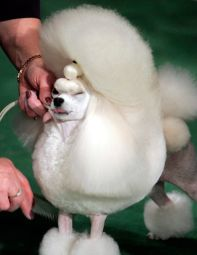

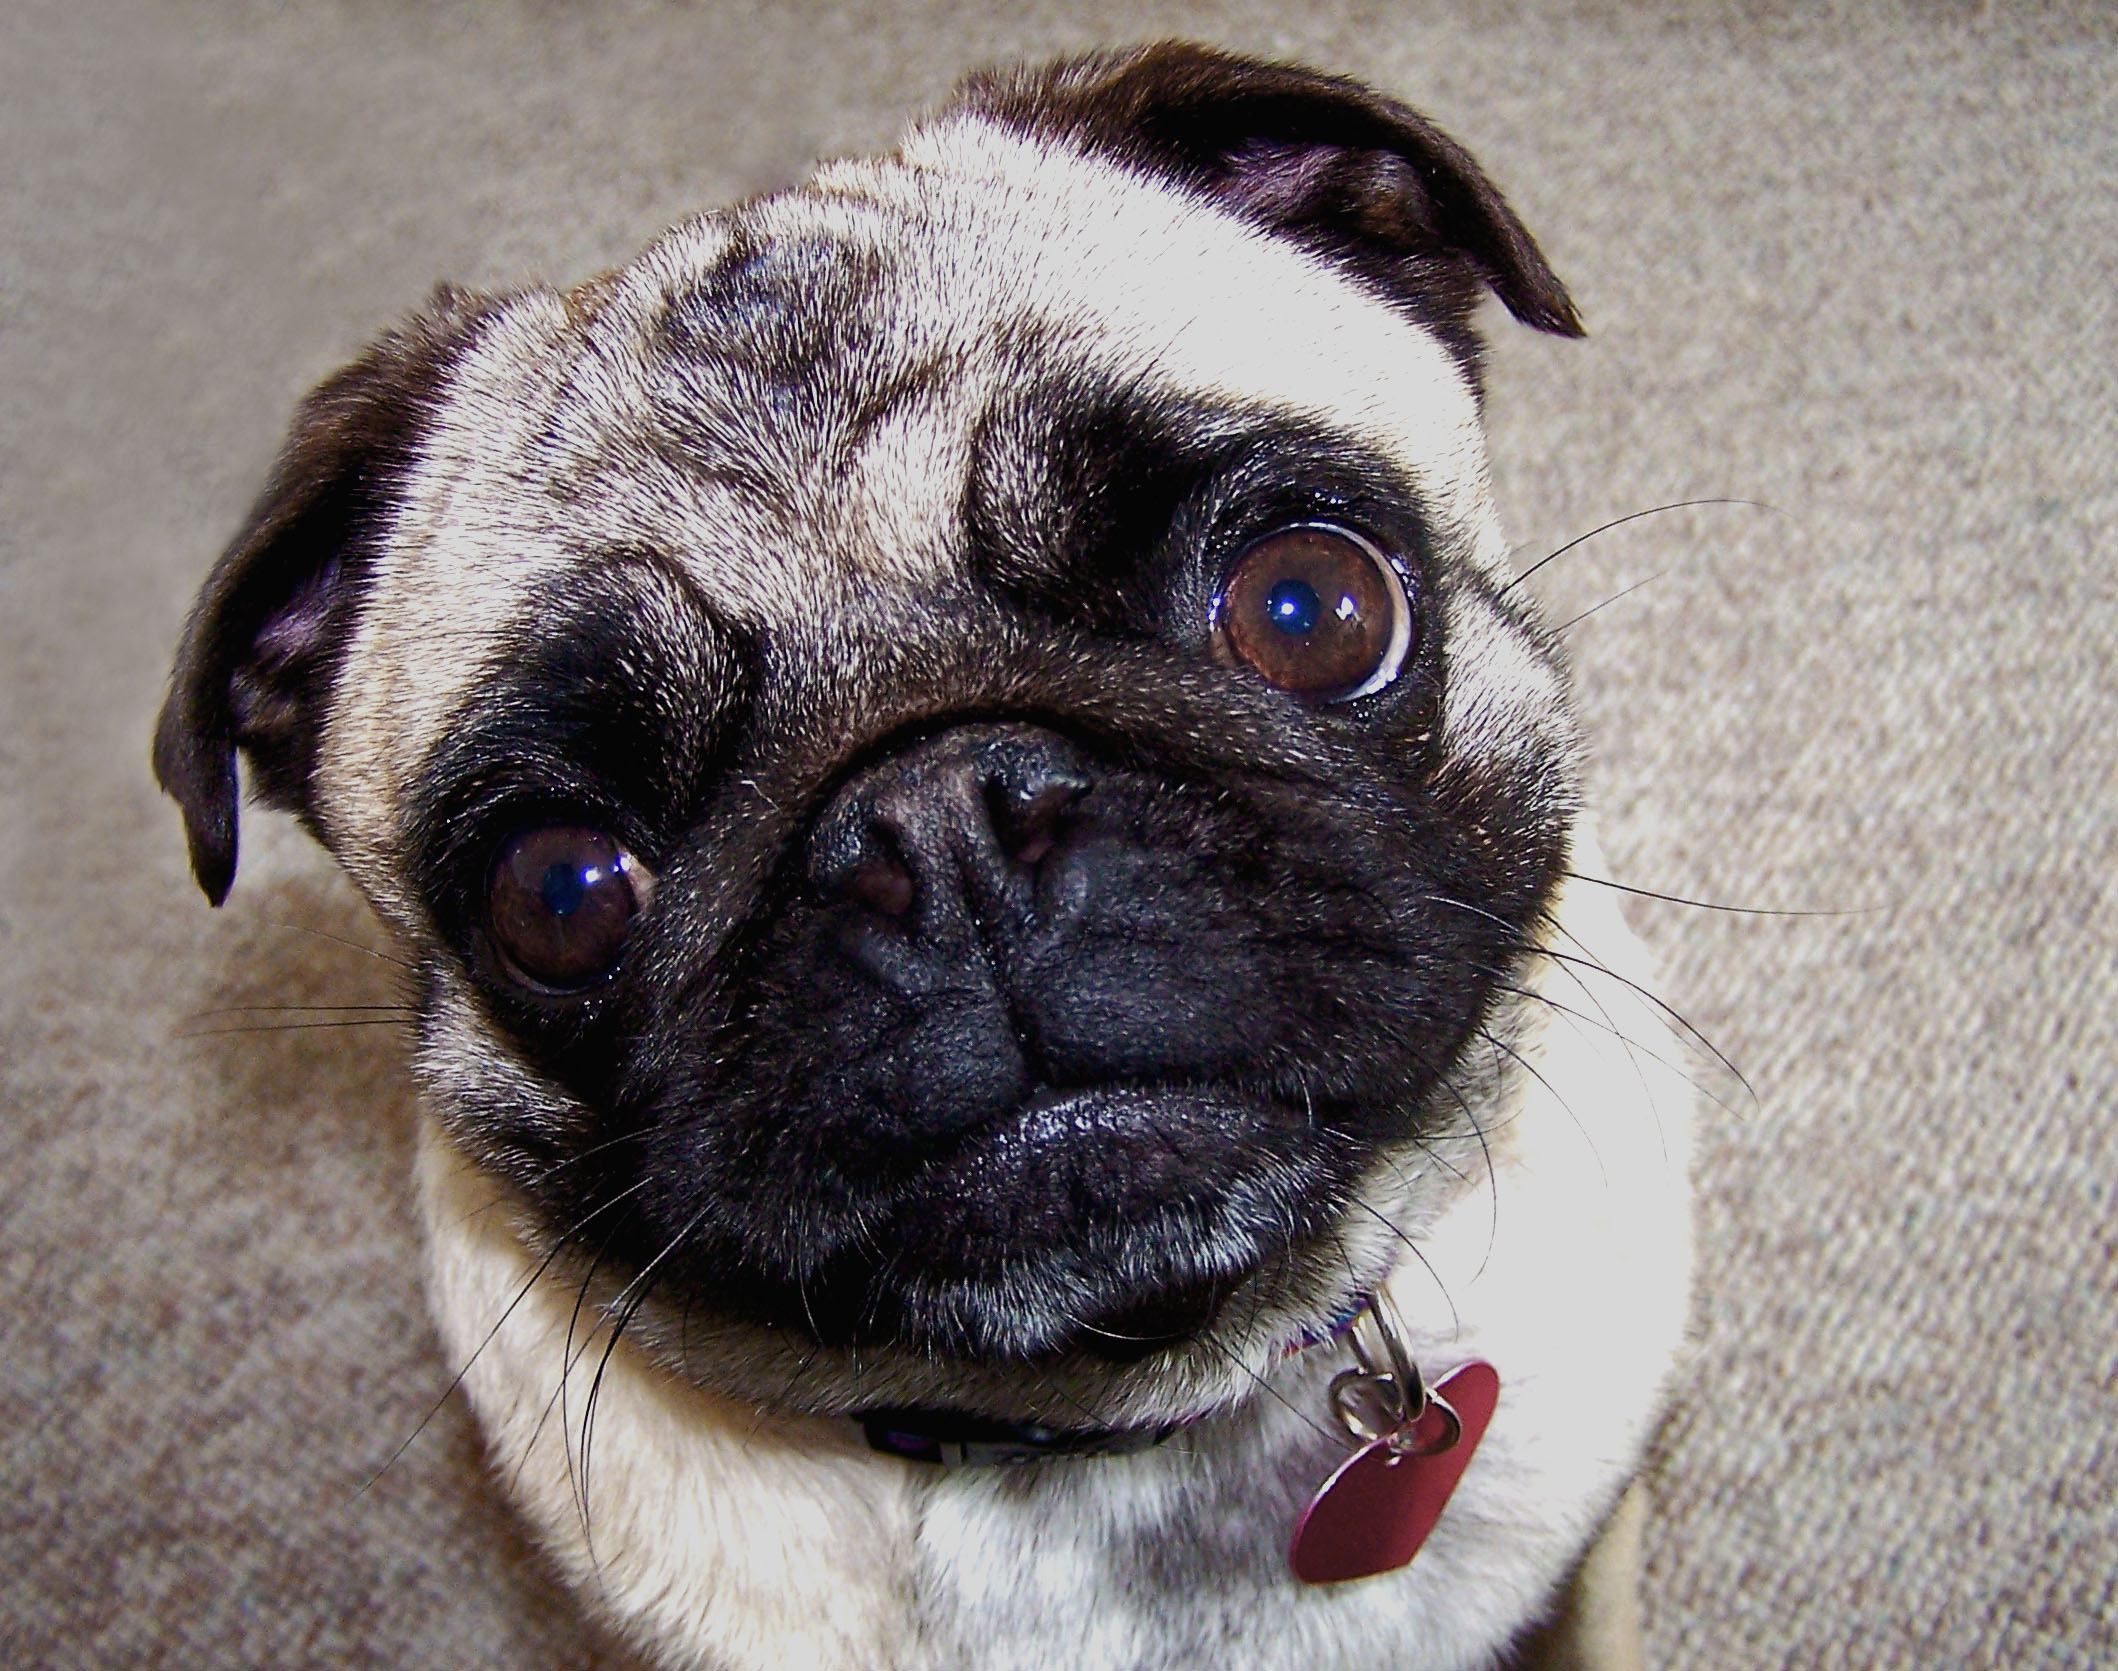

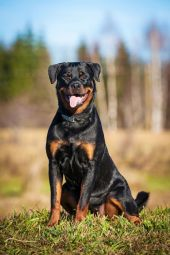

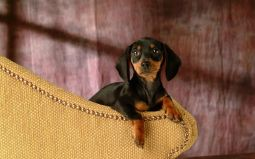

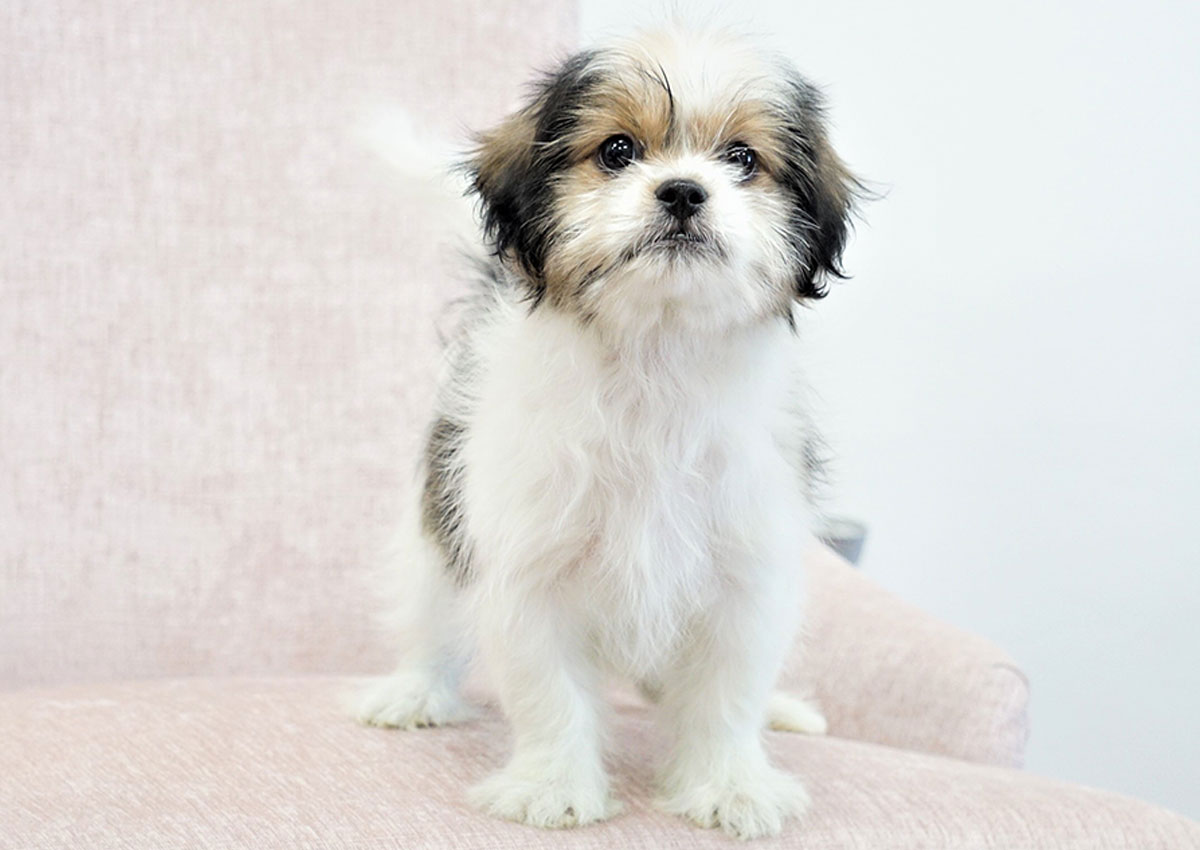

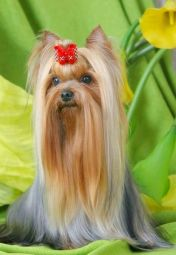

In [20]:
from IPython.display import Image 

# Mostrar algumas imagens
for classe in indice_para_classe.values():
    pasta_classe = os.path.join(pasta_treino, classe)
    arquivo_imagem = os.listdir(pasta_classe)[1]
    img = Image(filename=os.path.join(pasta_classe, arquivo_imagem))
    display(img)

#### <a>Transfer Learning</a>

Não fosse a mágica de reaproveitar uma rede já pré-treinada, sem chances de ter um modelo bom com poucas imagens como estamos criando nesse projeto. Vamos usar a rede VGG16.

In [21]:
# Vamos carregar nossa linda e maravilhosa VGG16, prontinha com milhões de imagens
# treinadas

vgg16 = models.vgg16(pretrained=True)

# Dar uma "cheirada" e analisada na estrutura da rede vgg16
vgg16

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [22]:
type(vgg16)

torchvision.models.vgg.VGG

In [23]:
# Congelar os parametros da rede pré-treinada
# Lembrando que o required_grad = False desliga o treinamento e atualização
# dos pesos (coeficientes) das camadas da rede neural
for param in vgg16.parameters():
    param.requires_grad = False

In [24]:
# Mudar a última camada para alterar o número de classes
# Lembrando que aproveitamos a rede inteira, só plugamos uma camada final
# que efetivamente vai aprender as nossas classes (hortifruti)

# Alterando de Linear(in_features=4096, out_features=1000, bias=True)
# para Linear(in_features=4096, out_features=16, bias=True), pois temos 16 raças
vgg16.classifier[6] = nn.Linear(4096, numero_de_classes)

# Incluindo softmax, que faz com que as probabilidades de ser cada uma das raças 
# seja 1 (converte efetivamente em probabilidades para facilitar nossa análise)
vgg16.classifier.add_module("7", nn.LogSoftmax(dim = 1))


vgg16

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [25]:
# Vamos utilizar a função de erro de entropia cruzada
# bastante comum para problemas de classificação
funcao_erro = nn.CrossEntropyLoss()

#### <a>Otimizador</a>

O Otimizador é quem efetivamente muda os pesos da rede de acordo com algum algoritmo

Nesse caso vamos utilizar o Adam Optimizer, mas poderíamos utilizar o Stochastic Gradient Descent, por exemplo

In [26]:
# Se você for rico e tiver uma RTX 3090 ti (que sonho!!)
# Mas se não for, sem problemas, sua CPU provavelmente vai dar conta do recado!
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [27]:
device

device(type='cuda', index=0)

In [28]:
# perceba que passamos os parâmetros da rede para o otimizador poder alterá-los
otimizador = optim.Adam(vgg16.parameters(), lr=0.001)
vgg16.to(device)

otimizador

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    maximize: False
    weight_decay: 0
)

#### <a>Treinar e Validar</a>

O treinamento realiza vários caminhos para frente (forward: previsão), cálculos de erro (distância entre previsão e valor real) e backward (backpropagation: aprendizado com o erro). A cada época, todas as imagens do treino são utilizadas para otimizar os parâmetros da rede. Dentro de cada época, utilizamos o treinamento em batch, ao invés de realizar o treinamento imagem por imagem.

Na validação, lembrar que não queremos manter o cálculo de gradientes, pois não vamos realizar o backpropagation.

In [29]:
def treinar_e_validar(modelo, metrica_erro, otimizador, epocas=10):
    '''
    Função para treinamento e validação
    Parâmetros
        :param modelo: modelo para treinar e validar
        :param metrica_erro: critério de erro para minização
        :param otimizador: otimizador para alterar os parâmetros da rede
        :param epocas: número de épocas (default=10)
  
    Retorna
        melhor_modelo: modelo treinado com a melhor acurácia na validação
        historico: (dicionário): histórico com erro no treinamento, erro na validação e acurácia
    '''
    
    # inicializando historico
    # a melhor acuracia de validação
    # melhor modelo de acordo com a validação
    historico = []
    melhor_acuracia = 0.0
    melhor_modelo = None
    
    print(device)
    
    # Cada época perpassa todas as imagens do treino e calcula erros de treino e validação
    # para aprendizado da rede neural
    for epoca in range(epocas):
        inicio_epoca = time.time()
        print("\n\nÉpoca: {}/{}".format(epoca+1, epocas))
        
        # Erro e acurácia de treino nessa época
        erro_treino = 0.0
        acertos_treino = 0.0
        
        # Erro e acurácia de validação nessa época
        erro_validacao = 0.0
        acertos_validacao = 0.0
        
        # Itera a cada lote de imagem. As entradas são os tensores do lote (batch)
        # e o label são as classificações de cada imagem do lote: um para cada raça
        for i, (imagens_lote, y_reais) in enumerate(data_loader_treino):
            #print(f"\nLote: {i+1}\n")
            
            # joga pra GPU ou CPU, dependendo do seu hardware e pytorch instalado
            imagens_lote = imagens_lote.to(device)
            y_reais = y_reais.to(device)
            
            # Limpar os gradientes: zerar os gradientes
            otimizador.zero_grad()

            # Forward pass - calcular saídas a partir das entradas utilizando o modelo
            # Como o lote tem 8 imagens, teremos 8 previsões
            previsoes = modelo(imagens_lote)


            '''
            # Vamos entender melhor o que está se passando!
            print(imagens_lote.size()) # temos um tensor com 8 imagens
            print(previsoes) # temos tensor com 8 previsoes, cada um com 4 valores de log probabilidade
            print(torch.exp(previsoes)) # convertendo para exponencial para termos probabilidades de verdade
           
            print(torch.max(previsoes.data, 1))
           
            # Dando uma olhada nos y_reais
            print(y_reais)


            # Vamos dar uma olhadinha nas imagens do batch!
            for indice in range(tamanho_do_batch):
                tensor_para_imagem = transforms.ToPILImage()
                imagem = tensor_para_imagem(imagens_lote[indice])
                display(imagem)

            break
            '''
                
            # Calcular erro das saidas que foram preditas no forward pass
            # comparando com as classificacoes reais (predito vs real)
            # e retorna a média dos erros (são 8 erros, lembra?)
            erro = metrica_erro(previsoes, y_reais)
           
            # O backpropagation é a junção do erro.backward() + otimizador.step()
            # erro.backward() calcula os gradientes, ou seja, qual a direção 
            # dos coeficientes para reduzir o erro
            # otimizador.step() atualiza os coeficientes de acordo com os gradientes
            # calculados no passo anterior
            
            # Realizar o cálculo dos gradientes a partir do erro de predição
            # O otimizador vai utilizar esses gradientes para saber
            # qual a direção deve atualizar os coeficientes da rede
            erro.backward()
            
            # Atualizar os parâmetros da rede de acordo com os gradientes calculados no backward
            otimizador.step()
            
            # Daqui pra frente são os cálculos de acurácia
            # para avaliar a evolução do modelo durante o treinamento
            # nas épocas
            
            # Calcular o erro total para esse lote (batch) e soma o erro no treino
            # O erro calculado já é a média dos 8 erros, portanto temos que multiplicar
            # pela quantidade de imagens do lote
            erro_treino += erro.item() * imagens_lote.size(0)
            
            # Cálculo da acurácia
            # Pra calcular a acurácia temos que buscar as classes preditas para cada imagem no lote
            
            # Cada tensor é uma imagem do lote com três posições: probabilidades de cada classe
            # torch.max vai retornar o valor da maior probabilidade, 
            # bem como a posição no tensor (tupla de saída)
            # A posição, portanto, vai indicar a classe com maior probabilidade (0,1,2 e 3)
            # 1o busca o valor máximo de cada tensor de cada imagem, que vai dar 
            # a classe final predita
            _, classes_previstas = torch.max(previsoes.data, 1)
            predicoes_corretas = (classes_previstas == y_reais).type(torch.FloatTensor)
            
            # Converter os acertos para float e calcular a acurácia média
            # do lote
            acertos = torch.mean(predicoes_corretas)
            
            # Calcular a acurácia total de treino do lote todo e adicionar a em train_acc
            acertos_treino += torch.sum(predicoes_corretas)
            
            #print("Treino - Lote número {:03d}, Erro: {:.4f}, Acurácia: {:.4f}".format(i, erro.item(), acuracia.item()))

            
        # Validação - não é necessário rastrear os gradientes, pois o modelo não vai ser treinado com a validação
        # "desliga" o autograd
        with torch.no_grad():

            # Mudando de treino para validação
            modelo.eval()

            # Iteração de validação
            for j, (imagens_lote, y_reais) in enumerate(data_loader_validacao):
                imagens_lote = imagens_lote.to(device)
                y_reais = y_reais.to(device)

                # Forward pass de validação
                # Previsão do modelo treinado nessa época
                previsoes = modelo(imagens_lote)

                # Calcular erro de validação
                # Previsto versus os verdadeiros hortifruti
                erro = metrica_erro(previsoes, y_reais)

                # Calcular erro de validação e adicionar a valid_loss
                erro_validacao += erro.item() * imagens_lote.size(0)

                # Calcular a acurácia de validação
                _, classes_previstas = torch.max(previsoes.data, 1)
                predicoes_corretas = (classes_previstas == y_reais).type(torch.FloatTensor)

                # Converter os acertos para float e calcular a acurácia média
                acertos = torch.mean(predicoes_corretas)

                # Calcular a acurácia total de validação do lote todo e adicionar a em train_acc
                acertos_validacao += torch.sum(predicoes_corretas)

                #print("Validação - Lote número: {:03d}, Erro: {:.4f}, Acurácia: {:.4f}".format(j, erro.item(), acuracia.item()))
        
        #break
        
        # Calcular a média de erro e acurácia no treino
        erro_medio_treino = erro_treino/num_imagens_treino
        acuracia_media_treino = acertos_treino/num_imagens_treino

        # Calcular a média de erro e acurácia na validação
        erro_medio_validacao = erro_validacao/num_imagens_validacao
        acuracia_media_validacao = acertos_validacao/num_imagens_validacao

        # Incluir no histórico os erros e acurácias méidas
        historico.append([erro_medio_treino, erro_medio_validacao, acuracia_media_treino, acuracia_media_validacao])
                
        fim_epoca = time.time()
    
        print("Época : {:03d}, Treino: Erro: {:.4f}, Acurácia: {:.4f}%, \n\t\tValidação : Erro : {:.4f}, Acurácia: {:.4f}%, Tempo: {:.4f}s".format(epoca+1, erro_medio_treino, acuracia_media_treino*100, erro_medio_validacao, acuracia_media_validacao*100, fim_epoca-inicio_epoca))
        
        # Testa se a acurácia na validação desse modelo nessa época é a melhor
        # Se for a melhor, salva no melhor modelo e na melhor acurácia
        if acuracia_media_validacao > melhor_acuracia:
            melhor_acuracia = acuracia_media_validacao
            #torch.save(modelo, './modelos/melhor_modelo.pt')
            melhor_modelo = modelo

    return melhor_modelo, historico

In [ ]:
indice_para_classe

In [30]:
# Define o número de épocas
numero_de_epocas = 5

# treina o modelo! Finalmente!!
modelo_treinado, historico = treinar_e_validar(vgg16, funcao_erro, otimizador, numero_de_epocas)

cuda:0


Época: 1/5


F:\leon\venvs\projeto_6_jornada\lib\site-packages\PIL\TiffImagePlugin.py:822: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


Época : 001, Treino: Erro: 0.3580, Acurácia: 89.3788%, 
		Validação : Erro : 0.3733, Acurácia: 85.6230%, Tempo: 41.7437s


Época: 2/5
Época : 002, Treino: Erro: 0.0987, Acurácia: 97.3547%, 
		Validação : Erro : 0.4727, Acurácia: 84.0256%, Tempo: 39.8319s


Época: 3/5
Época : 003, Treino: Erro: 0.0573, Acurácia: 98.9178%, 
		Validação : Erro : 0.4746, Acurácia: 84.0256%, Tempo: 38.0708s


Época: 4/5
Época : 004, Treino: Erro: 0.0375, Acurácia: 99.4790%, 
		Validação : Erro : 0.4320, Acurácia: 84.9840%, Tempo: 36.7874s


Época: 5/5
Época : 005, Treino: Erro: 0.0338, Acurácia: 99.5992%, 
		Validação : Erro : 0.4114, Acurácia: 86.5815%, Tempo: 38.7624s


#### <a>Histórico de treinamento e validação</a>

Podemos avaliar como foi a evolução do treinamento a cada época

In [ ]:
historico

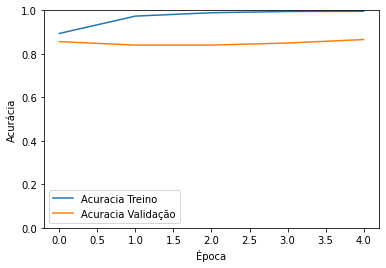

In [31]:
# Mostra o erro de treino e validação a cada época treinada
historico = np.array(historico)

plt.plot(historico[:,2:])
plt.legend(['Acuracia Treino', 'Acuracia Validação'])
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.ylim(0,1)
plt.show()

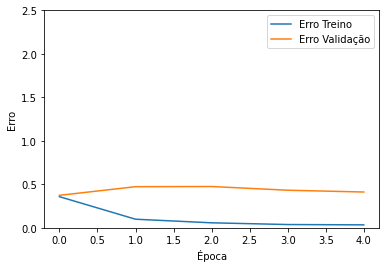

In [32]:
# Mostra o erro de treino e validação a cada época treinada
historico = np.array(historico)

plt.plot(historico[:,0:2])
plt.legend(['Erro Treino', 'Erro Validação'])
plt.xlabel('Época')
plt.ylabel('Erro')
plt.ylim(0,2.5)
plt.show()

#### <a>Função de predição</a>

Vamos criar a função para prever a classe de uma imagem com o melhor modelo treinado. É bem parecido com o que fazemos na validação, um "forward pass" na rede, sem atualizar os gradientes ou os parâmetros da rede.

In [ ]:
indice_para_classe

In [33]:
def predicao_racas(imagem_teste, rotacionar=False):
    '''
    Função para realizar a predição do status do AR
    Parâmetros
        :param imagem_teste: imagem já transformada com o PIL
    '''
    
    if rotacionar:
        imagem_teste=imagem_teste.rotate(270, expand=True)
    
    #print(imagem_teste)
    #imagem_teste = conserta_orientacao(imagem_teste)
    
    #imagem_teste = imagem_teste.resize((image_size, image_size), PIL.Image.ANTIALIAS)
    
    transformacao = transformacoes_de_imagens['teste']
   
    
    tensor_imagem_teste = transformacao(imagem_teste)

    # Testa se voce é rico, ops, se tem uma placa NVIDIA :) (ou se instalou a versão certa do PyTorch)
    if torch.cuda.is_available():
        tensor_imagem_teste = tensor_imagem_teste.view(1, 3, image_size, image_size).cuda()
    else:
        tensor_imagem_teste = tensor_imagem_teste.view(1, 3, image_size, image_size)
    
    dict_predicoes = dict()
    
    # Não precisa calcular os gradientes com o autograd
    with torch.no_grad():
        modelo_treinado.eval()
        # Modelo retorna as probabilidades em log (log softmax)
        predicoes_log = modelo_treinado(tensor_imagem_teste)
        
        # torch.exp para voltar a probabilidade de log para a probabilidade linear
        predicoes = torch.exp(predicoes_log)
        
        dict_predicoes = {indice_para_classe[classe]: float(predicoes[0][classe]) for classe in range(numero_de_classes)}
        
        #print(dict_predicoes)
        print(max(dict_predicoes.values()))
        
        maior_predicao = max(dict_predicoes.values())
        
        if (maior_predicao < 0.7) & (not rotacionar):
            return predicao_racas(imagem_teste, rotacionar=True)
   
    return dict_predicoes

#### <a>Previsão em imagens de teste</a>

Não utilizamos as imagens de teste em nenhum lugar! Assim que aprendemos que deve ser e faremos para todo o sempre como bons e boas cientistas de dados.

Vamos fazer algumas previsões só para "brincar" e depois calculamos a acurácia.

In [34]:
pastas_com_nomes_das_racas

['akita',
 'american pitbull',
 'beagle',
 'boxer',
 'buldogue_frances',
 'labrador',
 'leonberger',
 'lulu',
 'pastor_alemao',
 'pinscher',
 'poodle',
 'pug',
 'rotweiller',
 'salsicha',
 'shih_tzu',
 'yorkshire']

In [35]:
pasta_teste

'./data/processed/teste'

0.9999448657035828


'akita'

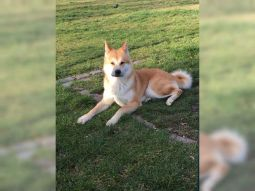

0.9969404935836792


'american pitbull'

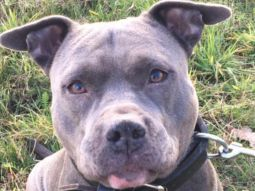

0.9844908118247986


'beagle'

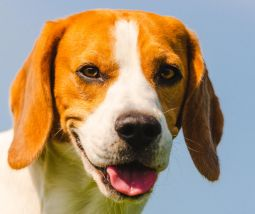

0.7937681674957275


'boxer'

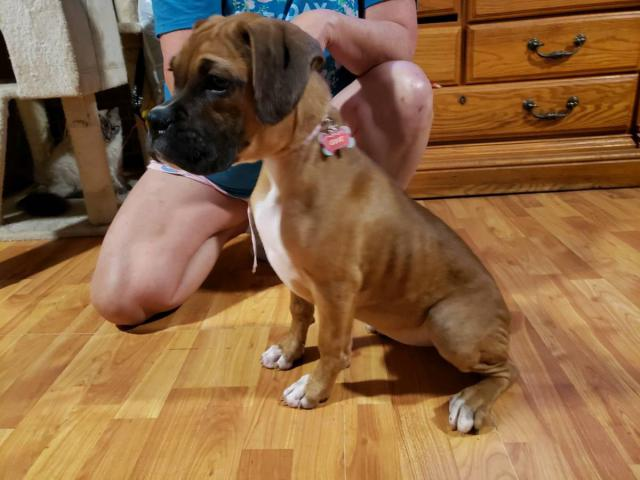

0.9241505861282349


'buldogue_frances'

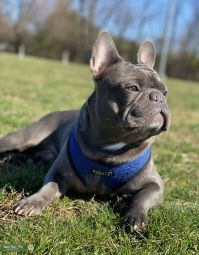

0.9935146570205688


'labrador'

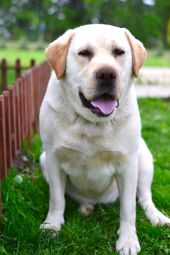

0.9781562089920044


'leonberger'

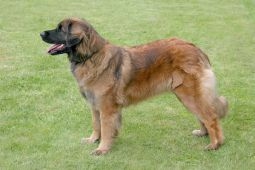

0.9996792674064636


'lulu'

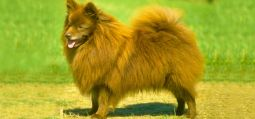

0.9910188317298889


'pastor_alemao'

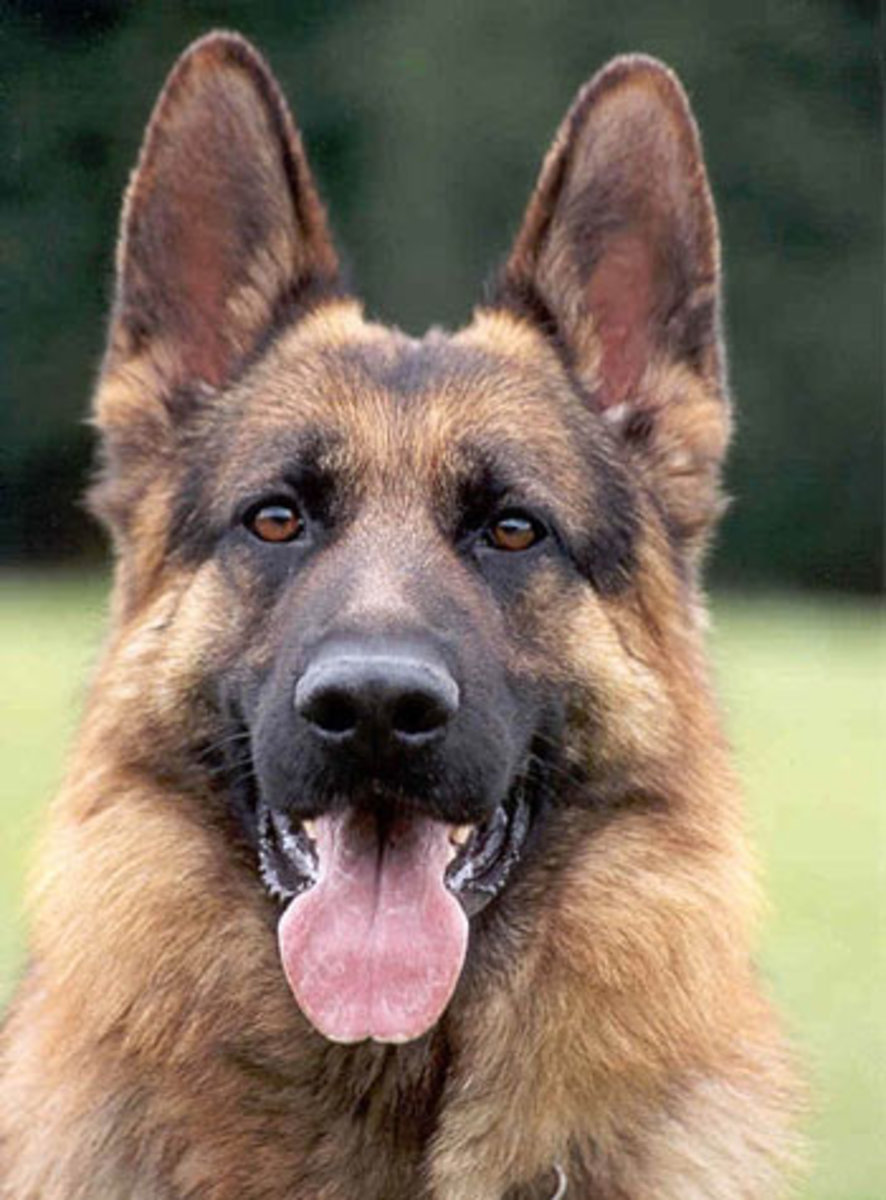

0.9984987378120422


'pinscher'

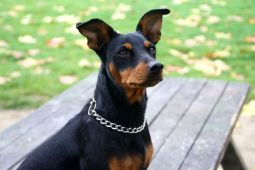

0.5593746900558472
0.9862433075904846


'pinscher'

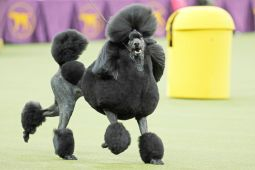

0.9646049737930298


'pug'

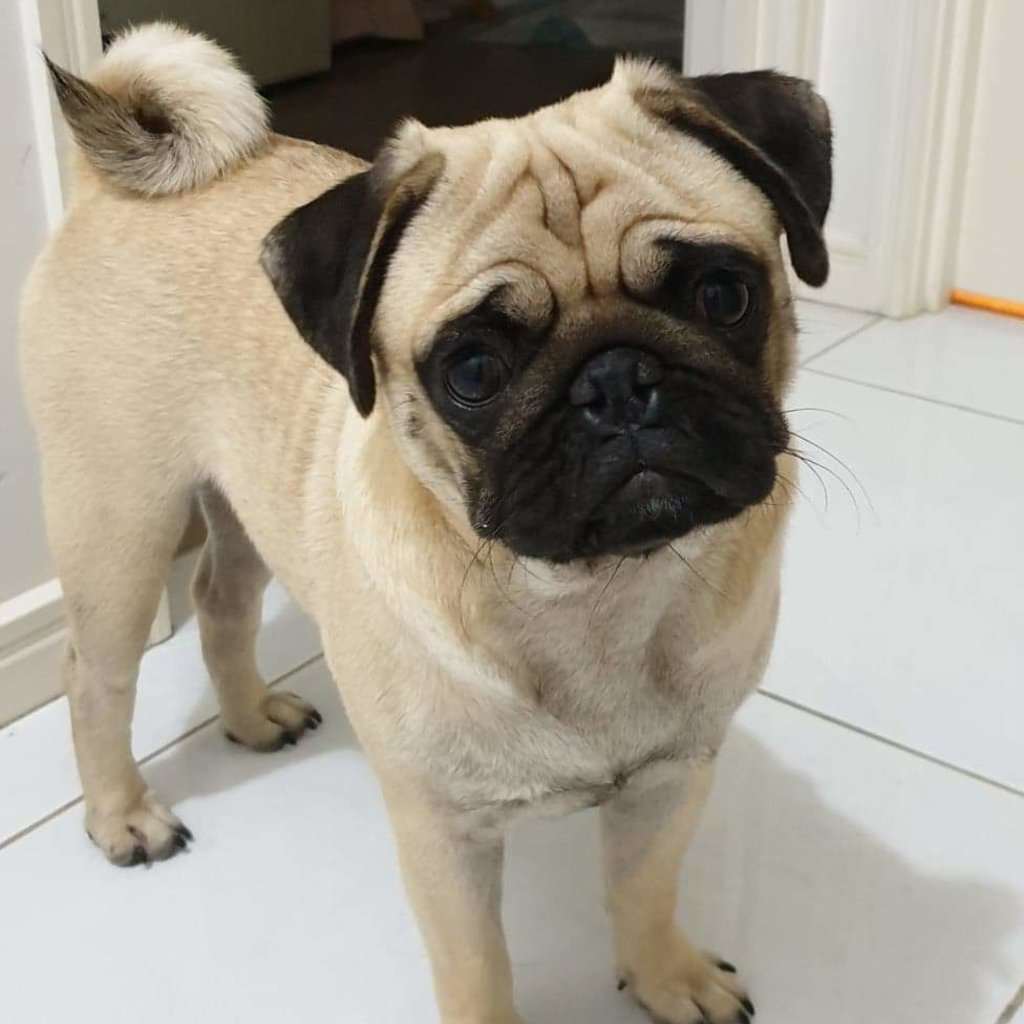

0.5878673791885376
0.9746574759483337


'pinscher'

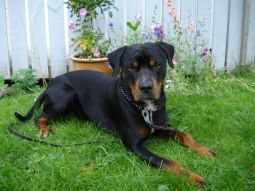

0.9457350969314575


'salsicha'

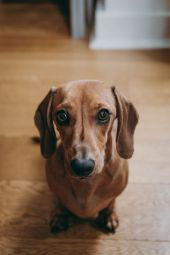

0.9850384593009949


'shih_tzu'

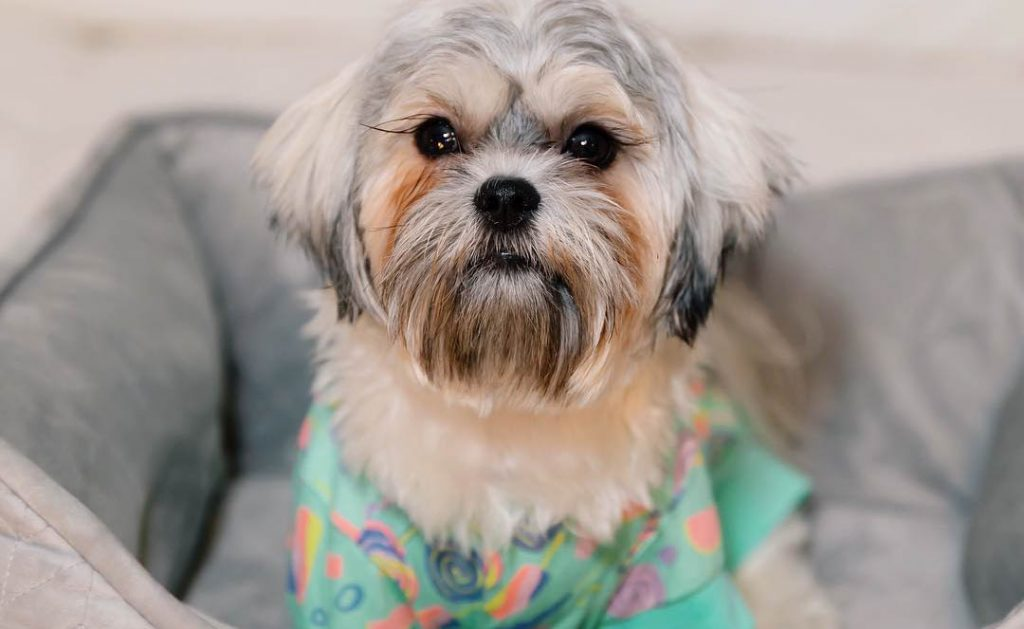

0.9957685470581055


'yorkshire'

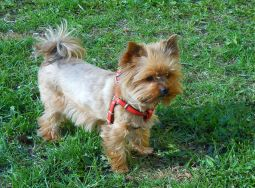

In [36]:
# Testando cada uma das classes

for indice, classe in enumerate(pastas_com_nomes_das_racas):
    pasta_teste_classe = os.path.join(pasta_teste, classe)
    imagem = os.path.join(pasta_teste_classe, os.listdir(pasta_teste_classe)[1])
    imagem_teste = PIL.Image.open(imagem)
   
    predicoes = predicao_racas(imagem_teste)
    
    display(max(predicoes, key=predicoes.get))
    display(imagem_teste)

#### <a>Deploy do Modelo</a>

Vamos fazer uma aplicação simples usando o maravilhoso Gradio! 

In [37]:
import gradio as gr

interface_gradio = gr.Interface(fn=predicao_racas, 
                                inputs=gr.inputs.Image(type="pil"), 
                                outputs="label").launch(share=True)


We want to invite you to become a beta user.
You'll get early access to new and premium features (persistent links, hosting, and more).
If you're interested please email: beta@gradio.app

Running on local URL:  http://127.0.0.1:7860/
Running on public URL: https://21593.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


0.998626708984375
0.9966952204704285
0.9981713891029358
0.9998524785041809
0.4397107660770416
0.699232816696167
0.9215121269226074
0.9999935626983643
0.3873479962348938
0.55132657289505
0.762173593044281
0.9998157620429993
0.9888535141944885
0.8180999159812927
0.7382628917694092
0.9999951720237732
0.9295409321784973
0.29197803139686584
0.22702136635780334
0.9783504009246826
0.5301907062530518
0.4719690680503845
1.0
0.5921309590339661
0.5866023898124695
0.3359666168689728
0.8135694861412048
0.9688600897789001
0.6786956191062927
0.8134385943412781
0.6334648728370667
0.9244146347045898
0.19729086756706238
0.4542883038520813
0.4093928337097168
0.6804392337799072
0.8260440230369568
0.41540956497192383
0.2696516215801239
0.49902817606925964
0.8771687746047974
0.30852246284484863
0.5046367049217224
0.6770753860473633
0.9748901724815369
0.7396728992462158
0.3486129939556122
0.7509790062904358
0.4899095892906189
0.7104774117469788
0.9960494637489319
0.9756676554679871
0.9562016129493713
0.99991